# Investigate which distribution best fit yearly prices & Correlation 

In [18]:
import pandas as pd
import glob
import os
from distfit import distfit
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import stats
from scipy.stats import expon,t


# Read CSV and convert commas to dots for numeric columns
df = pd.read_csv("EnergyReport.csv", sep=";", decimal=",")
df = df.drop(columns=['HourDK'])
df.index = pd.to_datetime(df["HourUTC"])
df = df.drop(columns=['HourUTC'])

In [19]:
df

,OnshoreWindGe50kW_MWhDK2,GrossConsumptionMWhDK2,DK2_EUR/MWh
HourUTC,,,
2019-12-31 23:00:00,229.717789,1410.602295,33.419998
2020-01-01 00:00:00,204.677185,1381.264282,31.770000
2020-01-01 01:00:00,214.743927,1340.298462,31.570000
2020-01-01 02:00:00,221.410843,1294.275391,31.280001
2020-01-01 03:00:00,238.787140,1254.853394,30.850000
...,...,...,...
2024-12-30 18:00:00,611.443579,2057.596875,33.000000
2024-12-30 19:00:00,613.892341,1937.079757,31.500000
2024-12-30 20:00:00,615.155000,1879.134644,31.410000


# Find Best Distribution for yearly prices

In [4]:
yearly_df = df.resample('Y').sum()
# Print statistics for each column
for column in yearly_df.columns:
    print(f"\n{column}:")
    print(f"Average: {yearly_df[column].mean():.2f}")
    print(f"Std Dev: {yearly_df[column].std():.2f}")


OnshoreWindGe50kW_MWhDK2:
Average: 1388214.99
Std Dev: 690091.27

GrossConsumptionMWhDK2:
Average: 11400944.88
Std Dev: 5597333.43

DK2_EUR/MWh:
Average: 699614.09
Std Dev: 633435.28


[01-07-2025 20:44:30] [distfit.distfit] [INFO] fit
[01-07-2025 20:44:30] [distfit.distfit] [INFO] transform
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 6.11835e-05] [loc=89.606 scale=56.897]
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 4.02136e-05] [loc=18.169 scale=71.437]
[01-07-2025 20:44:30] [distfit.distfit] [INFO] transform
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 6.11835e-05] [loc=89.606 scale=56.897]
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 4.02136e-05] [loc=18.169 scale=71.437]
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [pareto    ] [0.00 sec] [RSS: 4.02136e-05] [loc=-7874106691.164 scale=7874106709.333]
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [pareto    ] [0.00 sec] [RSS: 4.02136e-05] [loc=-7874106691.164 scale=7874106709.333]
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [dweibull  ] [0.03 sec] [RSS: 3.70725e-05] [loc=77.083 sca

Data shape after outlier removal: (42732, 3)


[01-07-2025 20:44:30] [distfit.distfit] [INFO] [genextreme] [0.16 sec] [RSS: 2.19261e-05] [loc=61.730 scale=37.114]
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [gamma     ] [0.01 sec] [RSS: 2.31789e-05] [loc=16.585 scale=51.686]
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [gamma     ] [0.01 sec] [RSS: 2.31789e-05] [loc=16.585 scale=51.686]
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [lognorm   ] [0.00 sec] [RSS: 2.07535e-05] [loc=-7.632 scale=82.916]
[01-07-2025 20:44:30] [distfit.distfit] [INFO] [lognorm   ] [0.00 sec] [RSS: 2.07535e-05] [loc=-7.632 scale=82.916]
[01-07-2025 20:44:31] [distfit.distfit] [INFO] [beta      ] [0.06 sec] [RSS: 3.11412e-05] [loc=18.169 scale=328.227]
[01-07-2025 20:44:31] [distfit.distfit] [INFO] [uniform   ] [0.00 sec] [RSS: 0.000133915] [loc=18.169 scale=254.829]
[01-07-2025 20:44:31] [distfit.distfit] [INFO] [beta      ] [0.06 sec] [RSS: 3.11412e-05] [loc=18.169 scale=328.227]
[01-07-2025 20:44:31] [distfit.distfit] [INFO] [uniform   ] [0.00 sec

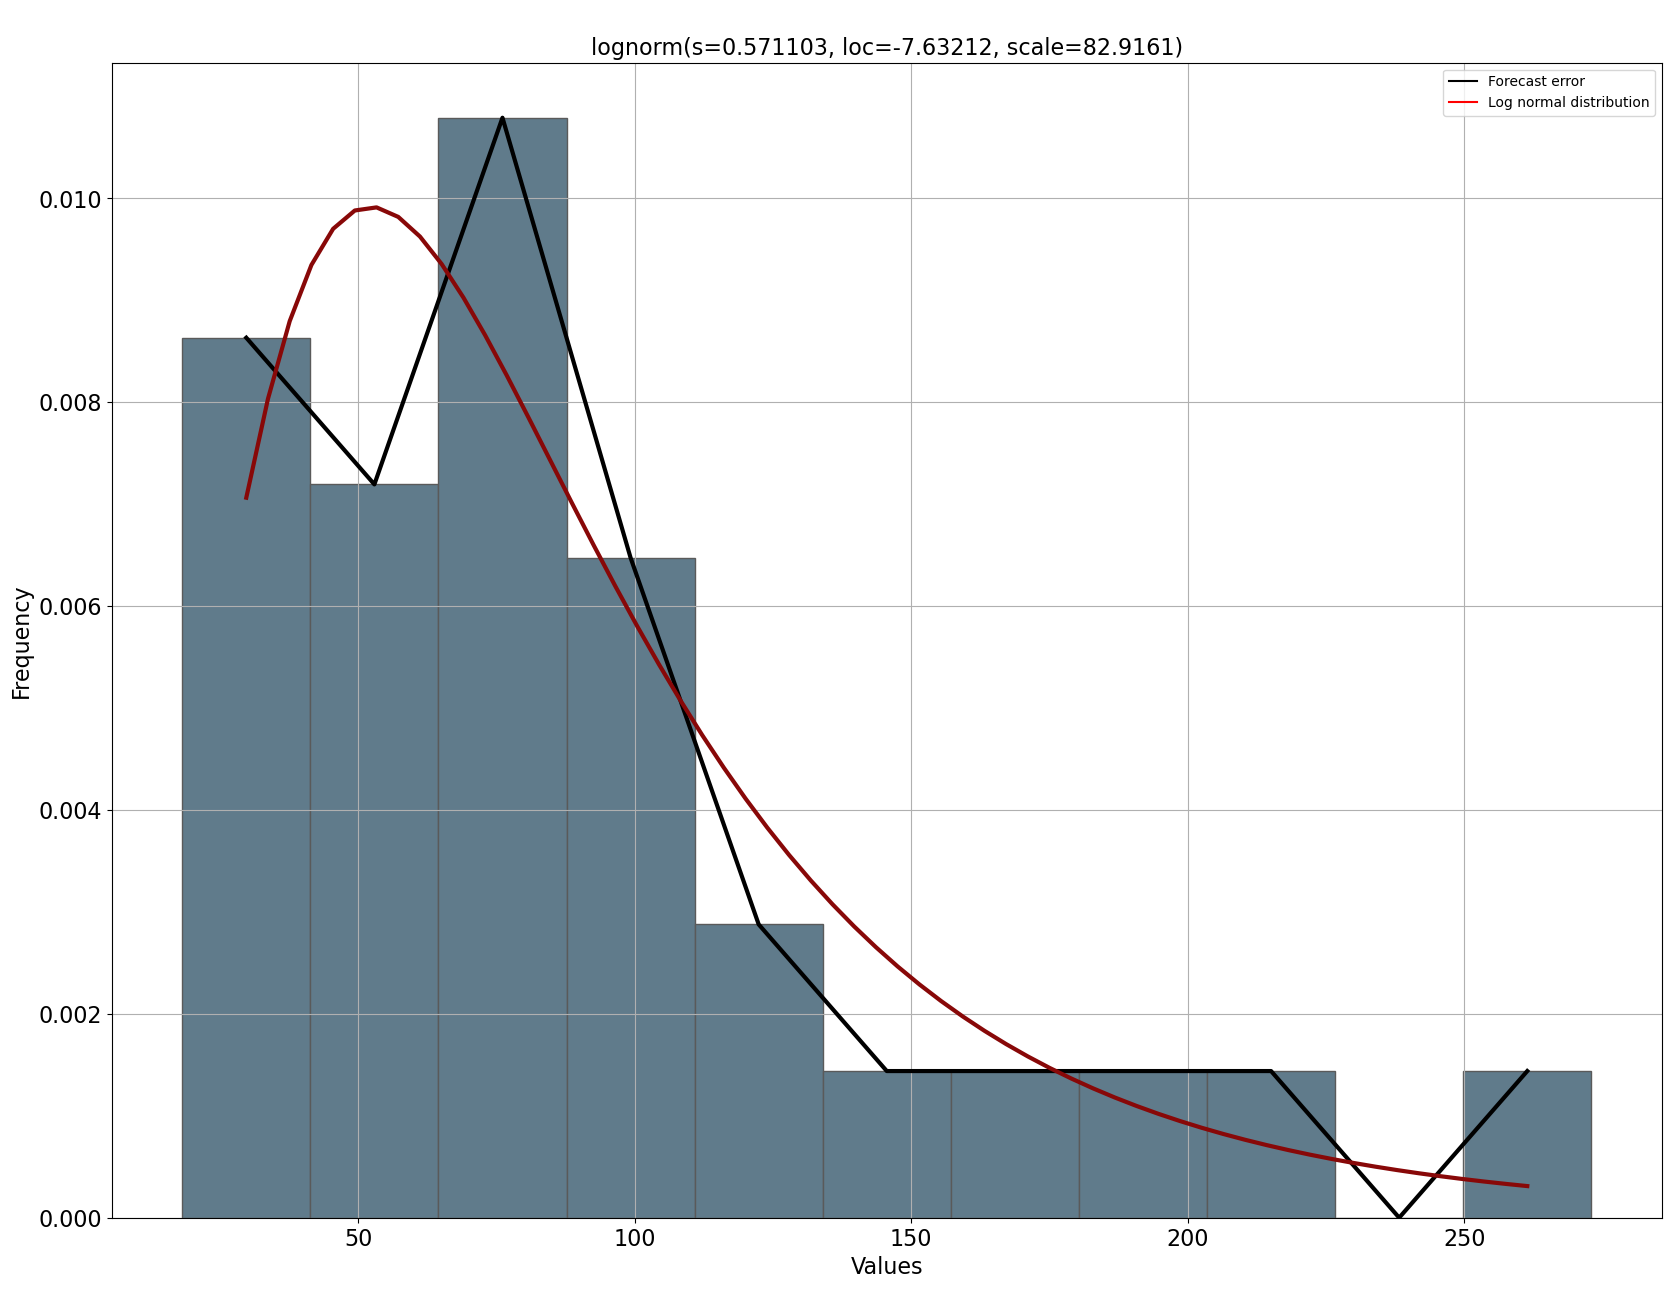

In [5]:
price_col = 'DK2_EUR/MWh'
mean_price = df[price_col].mean()
std_price = df[price_col].std()
df_clean = df[(df[price_col] > mean_price - 3*std_price) & 
              (df[price_col] < mean_price + 3*std_price)]

print("Data shape after outlier removal:", df_clean.shape)

# Remove negative prices if they exist and don't make economic sense
df_clean = df_clean[df_clean[price_col] > 0]

monthly_df = df_clean.resample('M').mean()
dist_monthly = distfit()
# Find best theoretical distribution for empirical data X
dist_monthly.fit_transform(monthly_df['DK2_EUR/MWh'][1:])
fig, ax = dist_monthly.plot()
ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='red', label="Log normal distribution")
handles = [l1, l2]
ax.legend(handles=handles)

# Find Correlation between Onshore production and Energy Prices

In [6]:
df_corr = df
df_corr  = df.resample('H').sum()


# Mean and std for price 
price_mu, price_std = df_corr['DK2_EUR/MWh'].mean(), df_corr['DK2_EUR/MWh'].std() # EUR/MWh

# Mean and std for production
prod_mu, prod_std = df_corr['OnshoreWindGe50kW_MWhDK2'].mean(), df_corr['OnshoreWindGe50kW_MWhDK2'].std() # MWh

corr = df_corr['DK2_EUR/MWh'].corr(df_corr['OnshoreWindGe50kW_MWhDK2'])


CR = 1 + corr * (prod_std / prod_mu) * (price_std / price_mu)
print(f"\nCorrelation between price and production: {corr:.2f}")
print(f"Capture Rate : {CR:.2f}")


Correlation between price and production: -0.33
Capture Rate : 0.69


# Load Profile 

In [8]:
df

,Branche,ConsumptionkWh
HourUTC,,
2020-12-31 23:00:00,Erhverv,8206.228
2021-01-01 00:00:00,Erhverv,8079.453
2021-01-01 01:00:00,Erhverv,8200.677
2021-01-01 02:00:00,Erhverv,8084.761
2021-01-01 03:00:00,Erhverv,8296.188
...,...,...
2024-12-30 18:00:00,Erhverv,15259.990
2024-12-30 19:00:00,Erhverv,14326.327
2024-12-30 20:00:00,Erhverv,14825.332


[01-07-2025 20:45:48] [distfit.distfit] [INFO] fit
[01-07-2025 20:45:48] [distfit.distfit] [INFO] transform
[01-07-2025 20:45:48] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 1.20949e-08] [loc=16711.518 scale=4864.481]
[01-07-2025 20:45:48] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 5.77541e-08] [loc=6987.146 scale=9724.372]
[01-07-2025 20:45:48] [distfit.distfit] [INFO] transform
[01-07-2025 20:45:48] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 1.20949e-08] [loc=16711.518 scale=4864.481]
[01-07-2025 20:45:48] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 5.77541e-08] [loc=6987.146 scale=9724.372]
[01-07-2025 20:45:48] [distfit.distfit] [INFO] [pareto    ] [0.02 sec] [RSS: 5.77541e-08] [loc=-2199023248564.853 scale=2199023255551.999]
[01-07-2025 20:45:48] [distfit.distfit] [INFO] [pareto    ] [0.02 sec] [RSS: 5.77541e-08] [loc=-2199023248564.853 scale=2199023255551.999]
[01-07-2025 20:45:48] [distfit.distfit] [INFO] [dweibull  ] [0.20 sec] [RSS

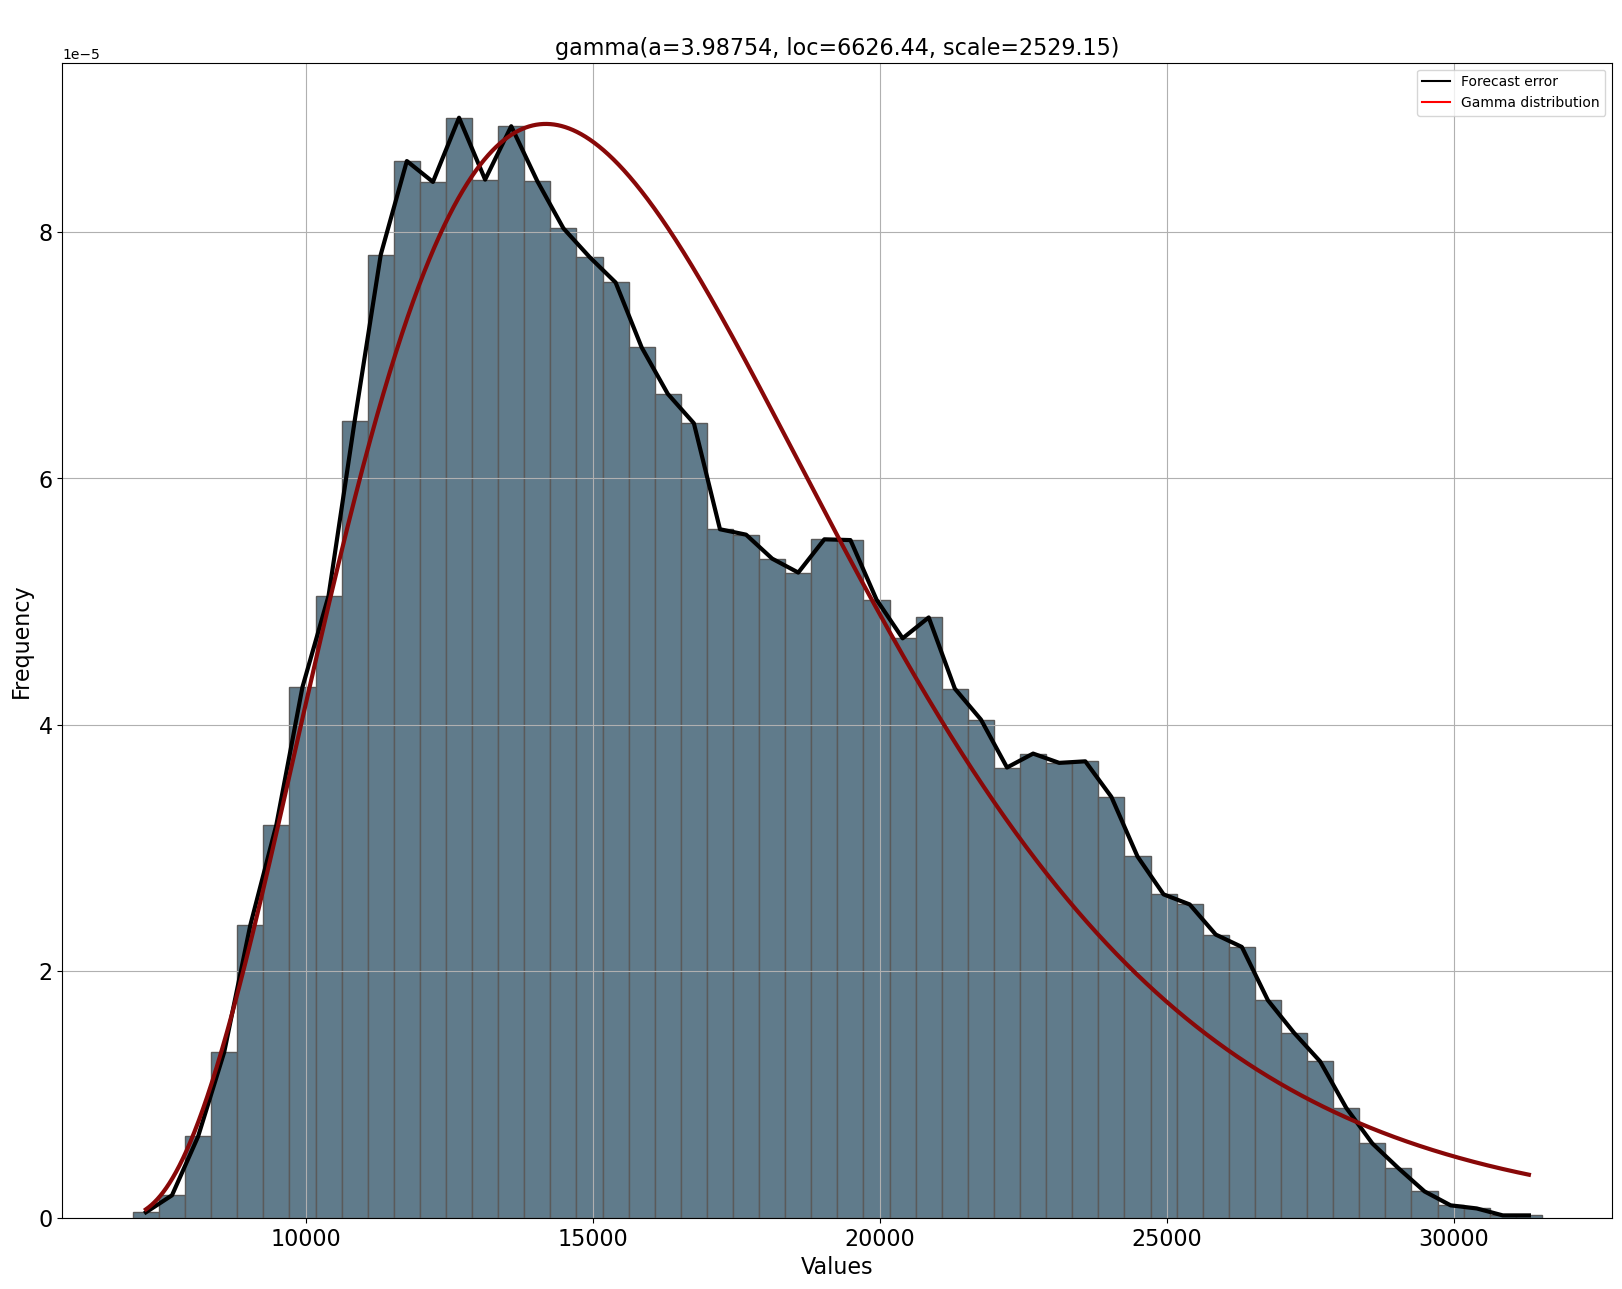

In [10]:
dist_hourly_consumption = distfit()
# Load hourly consumption data
df_cons = pd.read_csv("ConsumptionIndustry.csv", sep=";", decimal=",")
df_cons["HourUTC"] = pd.to_datetime(df_cons["HourUTC"])
df_cons = df_cons.set_index("HourUTC")
df_cons.drop(columns=['HourDK','MunicipalityNo'], inplace=True)
# Only keep rows where 'Branche' == 'Erhverv'
df_cons = df_cons[df_cons['Branche'] == 'Erhverv']

# Find best theoretical distribution for empirical data X
dist_hourly_consumption.fit_transform(df_cons['ConsumptionkWh'][1:])
fig, ax = dist_hourly_consumption.plot()
ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='red', label="Gamma distribution")
handles = [l1, l2]
ax.legend(handles=handles)

[01-07-2025 20:48:19] [distfit.distfit] [INFO] fit
[01-07-2025 20:48:19] [distfit.distfit] [INFO] transform
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 1.54595e-14] [loc=12199060.061 scale=1471026.238]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 5.03563e-14] [loc=9761934.443 scale=2437125.618]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] transform
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [norm      ] [0.00 sec] [RSS: 1.54595e-14] [loc=12199060.061 scale=1471026.238]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [expon     ] [0.00 sec] [RSS: 5.03563e-14] [loc=9761934.443 scale=2437125.618]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [pareto    ] [0.00 sec] [RSS: 2.07438e-13] [loc=9761934.443 scale=0.000]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [pareto    ] [0.00 sec] [RSS: 2.07438e-13] [loc=9761934.443 scale=0.000]


[01-07-2025 20:48:19] [distfit.distfit] [INFO] [dweibull  ] [0.02 sec] [RSS: 2.90435e-14] [loc=12193142.321 scale=1371923.233]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [t         ] [0.07 sec] [RSS: 1.54595e-14] [loc=12199060.016 scale=1471026.230]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [t         ] [0.07 sec] [RSS: 1.54595e-14] [loc=12199060.016 scale=1471026.230]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [genextreme] [0.07 sec] [RSS: 1.93364e-13] [loc=9761936.430 scale=16.613]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [genextreme] [0.07 sec] [RSS: 1.93364e-13] [loc=9761936.430 scale=16.613]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [gamma     ] [0.02 sec] [RSS: 1.1469e-14] [loc=8712817.786 scale=672832.130]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [lognorm   ] [0.00 sec] [RSS: 1.17465e-14] [loc=5936955.473 scale=6090878.361]
[01-07-2025 20:48:19] [distfit.distfit] [INFO] [beta      ] [0.01 sec] [RSS: 8.08497e-15] [loc=9732112.591 scale=6465539.311]
[

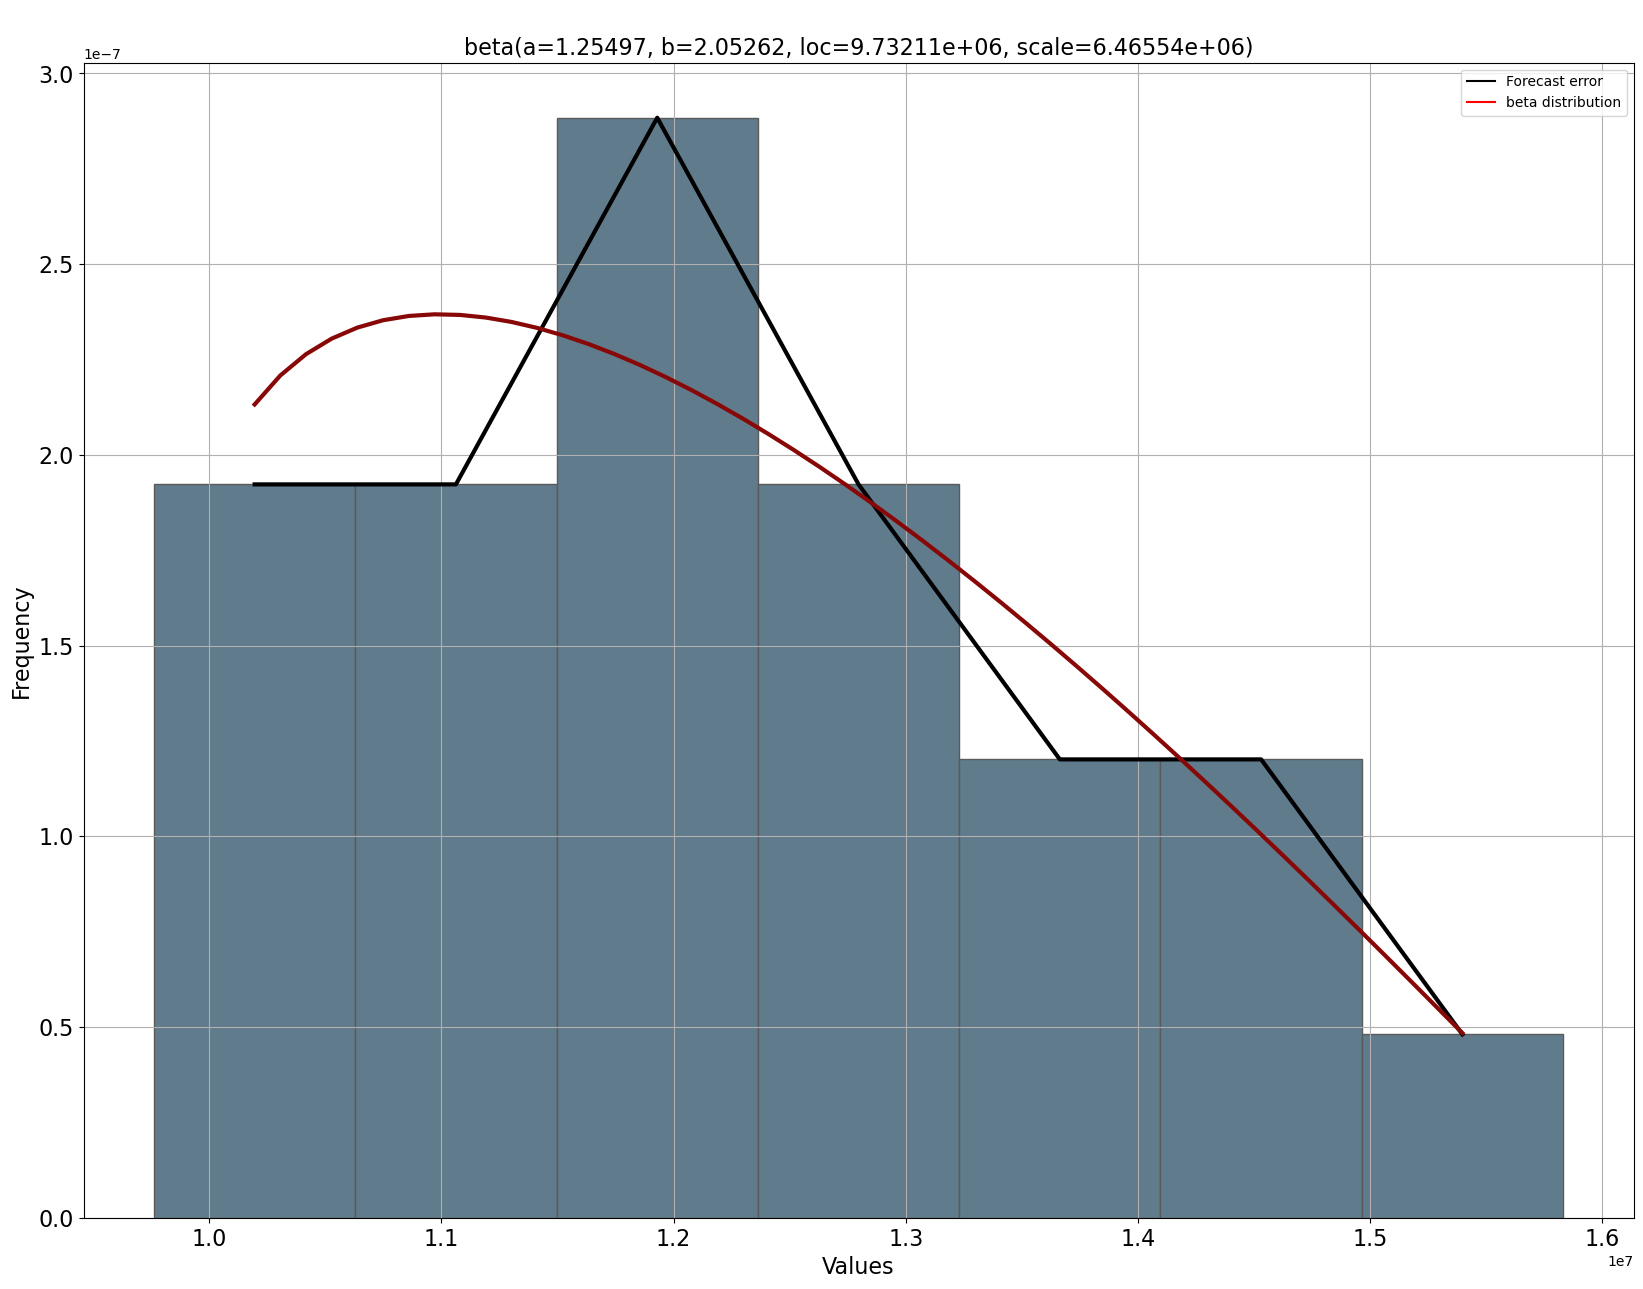

In [17]:
monthly_df_consumption = df_cons.resample('M').sum()
dist_monthly_consumption = distfit()
# Find best theoretical distribution for empirical data X
dist_monthly_consumption.fit_transform(monthly_df_consumption['ConsumptionkWh'][1:].values)
fig, ax = dist_monthly_consumption.plot()
ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='red', label="beta distribution")
handles = [l1, l2]
ax.legend(handles=handles)

In [24]:
df_corr = df
df_corr  = df.resample('H').sum()

# Mean and std for Consumption 
consump_mu, consump_std = df_corr['GrossConsumptionMWhDK2'].mean(), df_corr['GrossConsumptionMWhDK2'].std() # MWh

corr = df_corr['DK2_EUR/MWh'].corr(df_corr['GrossConsumptionMWhDK2'])


CR = 1 + corr * (consump_std / consump_mu) * (price_std / price_mu)
print(f"\nCorrelation between price and consumption: {corr:.2f}")
print(f"Capture Rate : {CR:.2f}")


Correlation between price and consumption: 0.07
Capture Rate : 1.01


In [40]:
df_cons = pd.read_csv("ConsumptionIndustry.csv", sep=";", decimal=",")
df_cons["HourUTC"] = pd.to_datetime(df_cons["HourUTC"])
df_cons = df_cons.set_index("HourUTC")
df_cons.drop(columns=['HourDK','MunicipalityNo'], inplace=True)
# Only keep rows where 'Branche' == 'Erhverv'
df_cons = df_cons[df_cons['Branche'] == 'Erhverv']
df_cons["ConsumptionMWh"] = df_cons["ConsumptionkWh"]/1000
df_combined = pd.concat([df_corr, df_cons], axis=1).dropna()


In [42]:
price_mu, price_std = df_combined['DK2_EUR/MWh'].mean(), df_combined['DK2_EUR/MWh'].std() # EUR/MWh
consump_mu, consump_std = df_combined['ConsumptionMWh'].mean(), df_combined['ConsumptionMWh'].std() # MWh

corr = df_combined['DK2_EUR/MWh'].corr(df_combined['ConsumptionMWh'])


CR = 1 + corr * (consump_std / consump_mu) * (price_std / price_mu)
print(f"\nCorrelation between price and consumption: {corr:.2f}")
print(f"Capture Rate : {CR:.2f}")



Correlation between price and consumption: -0.23
Capture Rate : 0.88
